<a href="https://colab.research.google.com/github/gitty-scientiest/IBM-module-2-/blob/main/Feature_eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

While searching for the dream house, the buyer looks at various factors, not just at the height of the basement ceiling or the proximity to an east-west railroad.
Using the dataset, we have to find the factors that influence price negotiations while buying a house.




**Domain :- House sales**





**Analysis task to be performed :**





  1.	Understand the dataset:
  2.	Generate a separate dataset for numerical and categorical variables.
  3.	EDA of numerical variables:
  4.	EDA of categorical variables
  5.	Combine all the significant categorical and numerical variables
  6.	Plot box plot for the new dataset to find the variables with outliers











In [84]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


# **1. Import the dataset**

In [85]:
df = pd.read_csv("/content/PEP1.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


**To understand Data characterstics**

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [87]:
df.shape

(1460, 81)

# **Data Preprosessing**

In [88]:
#To check the null values
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [89]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functiol', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', '

In [90]:
# selecting numerical and categorical columns
df1 = df._get_numeric_data()
df1

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [91]:
df2 = df.select_dtypes(include=['object'])
df2

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# **EDA for numerical values or df1**

In [92]:
# Missing value treatment
df1.isna().sum()


Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchebvGr         0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [93]:
df1.drop(['GarageYrBlt','LotFrontage'],axis=1,inplace=True)

In [94]:
df1.isna().sum()


Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchebvGr       0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

**Identify the skewness and distribution**

*calculating skewness and kurtosis for distribution*

In [95]:
import scipy as scipy
from scipy.stats import skew

In [96]:
df1.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [97]:
df1.skew(axis=0 )

Id                0.000000
MSSubClass        1.407657
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchebvGr        4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
dtype: float64

In [98]:
from scipy.stats import kurtosis

In [99]:
df1.kurtosis(axis=0)

Id                -1.200000
MSSubClass         1.580188
LotArea          203.243271
OverallQual        0.096293
OverallCond        1.106413
YearBuilt         -0.439552
YearRemodAdd      -1.272245
MasVnrArea        10.082417
BsmtFinSF1        11.118236
BsmtFinSF2        20.113338
BsmtUnfSF          0.474994
TotalBsmtSF       13.250483
1stFlrSF           5.745841
2ndFlrSF          -0.553464
LowQualFinSF      83.234817
GrLivArea          4.895121
BsmtFullBath      -0.839098
BsmtHalfBath      16.396642
FullBath          -0.857043
HalfBath          -1.076927
BedroomAbvGr       2.230875
KitchebvGr        21.532404
TotRmsAbvGrd       0.880762
Fireplaces        -0.217237
GarageCars         0.220998
GarageArea         0.917067
WoodDeckSF         2.992951
OpenPorchSF        8.490336
EnclosedPorch     10.430766
3SsnPorch        123.662379
ScreenPorch       18.439068
PoolArea         223.268499
MiscVal          701.003342
MoSold            -0.404109
YrSold            -1.190601
SalePrice          6

In [100]:
print(kurtosis(df1, axis=0,bias=True))

[-1.20000113e+00  1.57067477e+00  2.02543793e+02  9.18565484e-02
  1.09852123e+00 -4.42154846e-01 -1.27199914e+00             nan
  1.10760899e+01  2.00404155e+01  4.69262079e-01  1.32010416e+01
  5.72207603e+00 -5.55676727e-01  8.29459324e+01  4.87426576e+00
 -8.40334172e-01  1.63364361e+01 -8.58217332e-01 -1.07734949e+00
  2.21913515e+00  2.14546266e+01  8.73641374e-01 -2.20600734e-01
  2.16134872e-01  9.09822795e-01  2.97860414e+00  8.45718041e+00
  1.03909716e+01  1.23235177e+02  1.83718741e+01  2.22500507e+02
  6.98600840e+02 -4.06833508e-01 -1.19063386e+00  6.50981201e+00]


**correlation Matrix for Numeric data**

In [101]:
df1_corr = df1.corr()
df1_corr

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


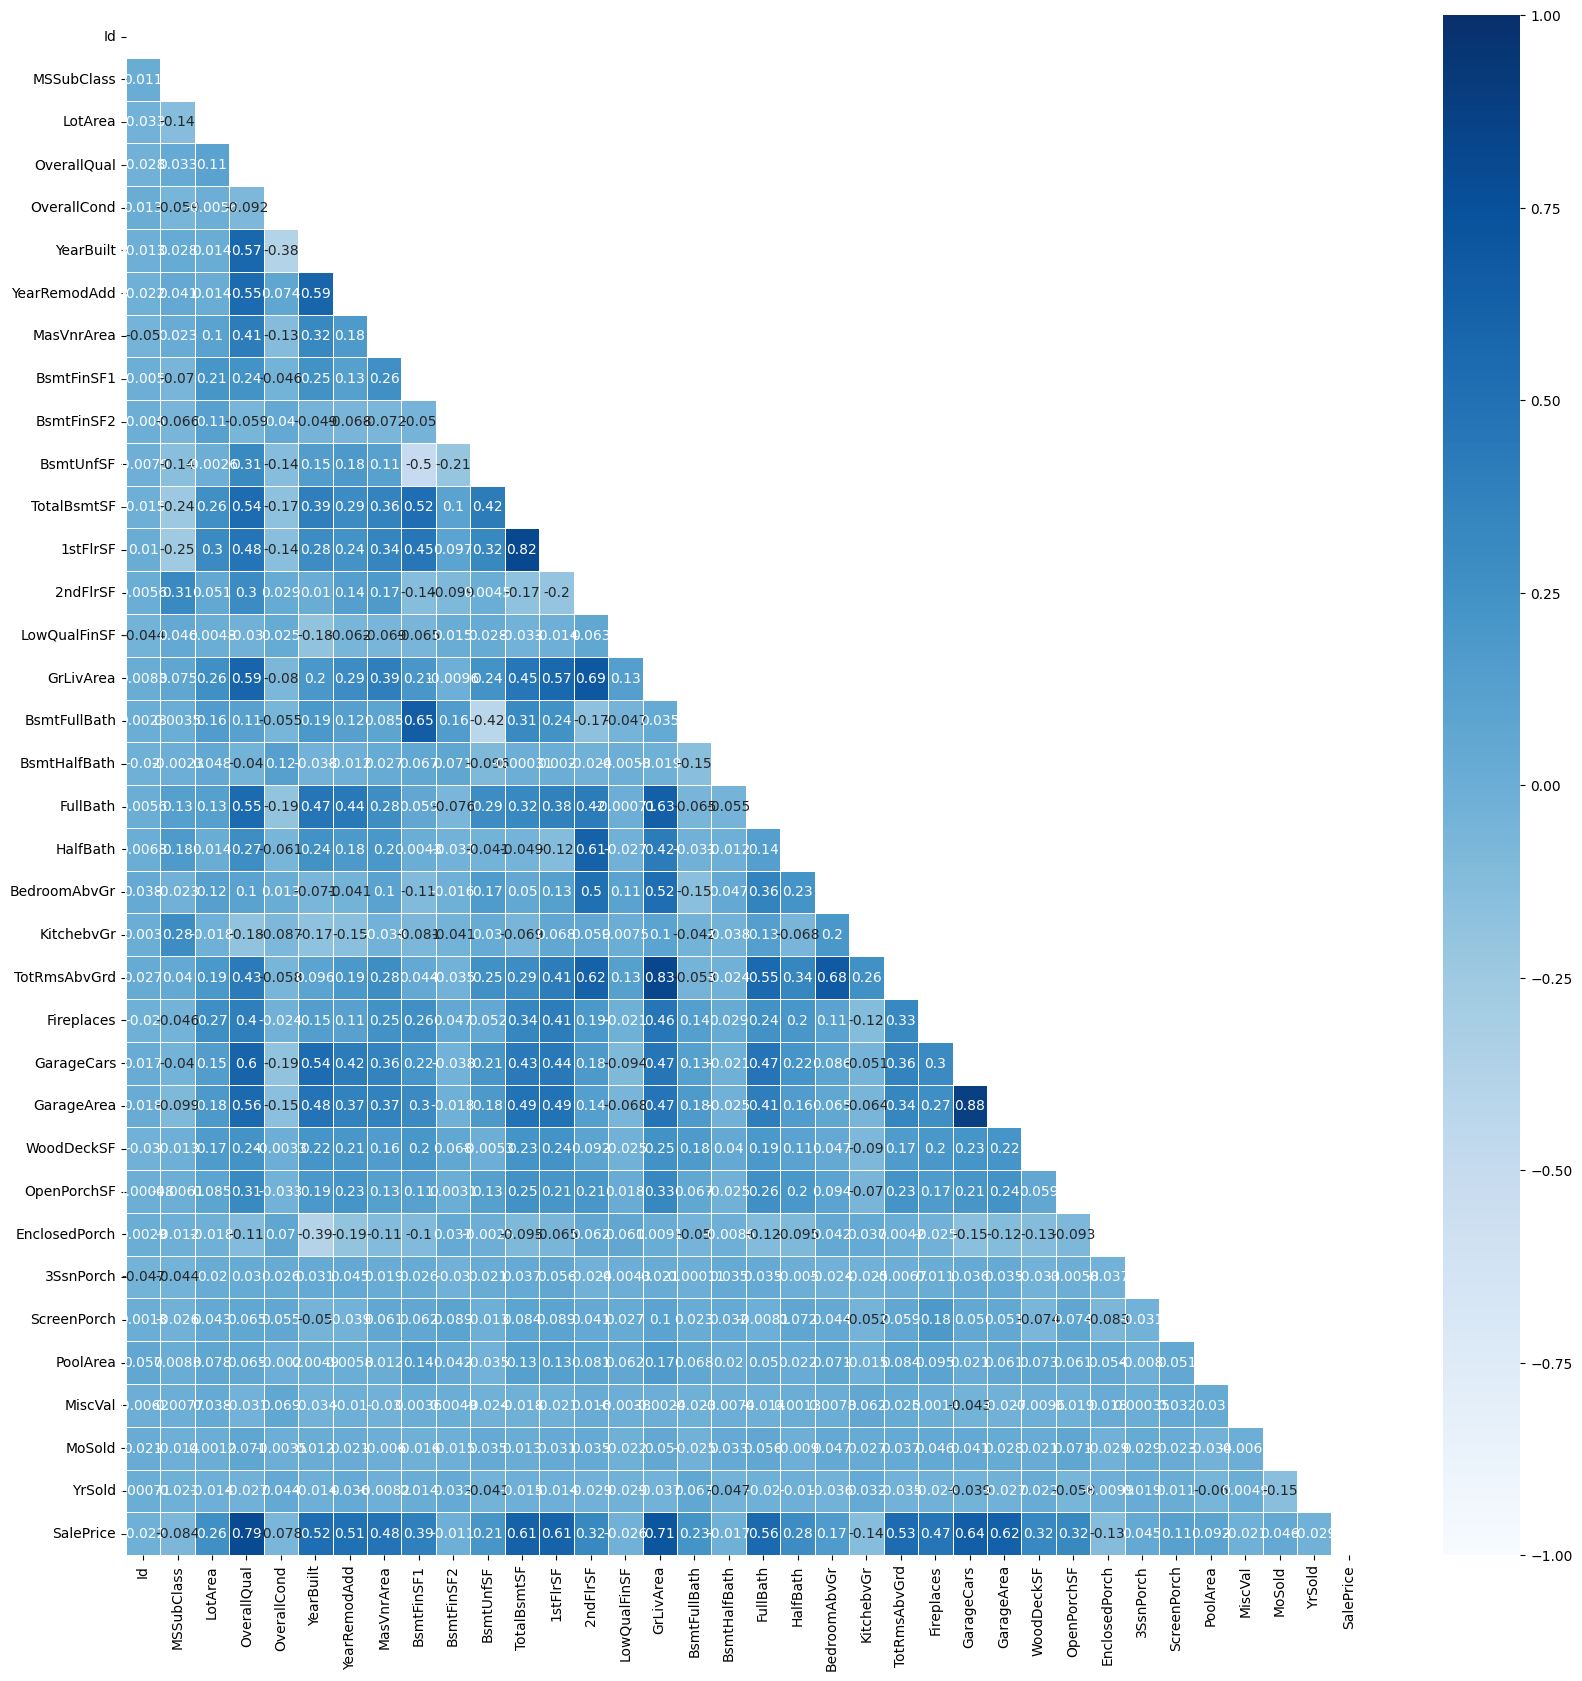

In [102]:
plt.figure(figsize=(20,20))
df1_chart = np.triu(np.ones_like(df1_corr))
sn.heatmap(df1_corr,vmin=-1,vmax=1,annot=True,mask=df1_chart,cmap='Blues',linecolor='white',linewidths=0.5)
plt.show()

**From the Map-**
1. Heat map shows 'SalePrice' having very strong positive correlation (>0.7) with 'OverallQual' and 'GrLivArea'.

2. THE columns -['YearBuilt', 'YearRemodAdd','TotalBsmtSF', '1stFlrSF', 'FullBath','TotRmsAbvGrd', 'GarageCars', 'GarageArea'] have positive correlation(>0.5) with the target variable 'SalePrice'.

Thus these variables (with correlation (>0.5)) are significant variables.

# **Pair plot For Distribution and Density**

*using scatter plot*

In [103]:
#selecting variables with more unique values to get better plot
df1.nunique()[df1.nunique()>200].index

Index(['Id', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'SalePrice'],
      dtype='object')

dominate the variable('ID') as it is insignificant.

In [104]:
#combining and selecting numeric variables with more unique values and high correlation with 'SalePrice'
final_df = df1[['SalePrice','LotArea','OverallQual','YearBuilt','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea']]

In [105]:
final_df.tail(3)

,SalePrice,LotArea,OverallQual,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea
1457,266500,9042,7,1941,1188,1152,2340,252
1458,142125,9717,5,1950,1078,0,1078,240
1459,147500,9937,5,1965,1256,0,1256,276


Here final df is showing all the significant variable affecting the sales price .

**Ploting for probability density function**

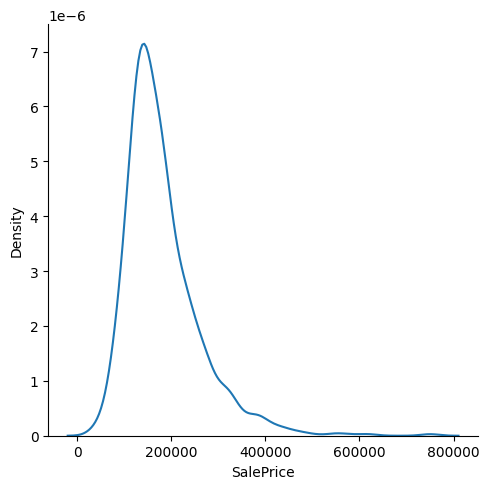

In [106]:
sn.displot(final_df['SalePrice'],kind='kde')

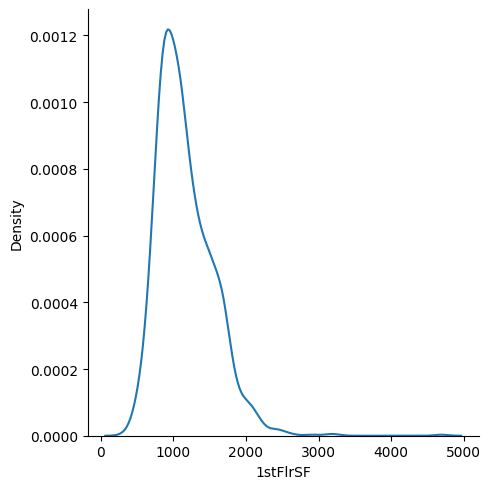

In [107]:
sn.displot(final_df['1stFlrSF'],kind='kde')

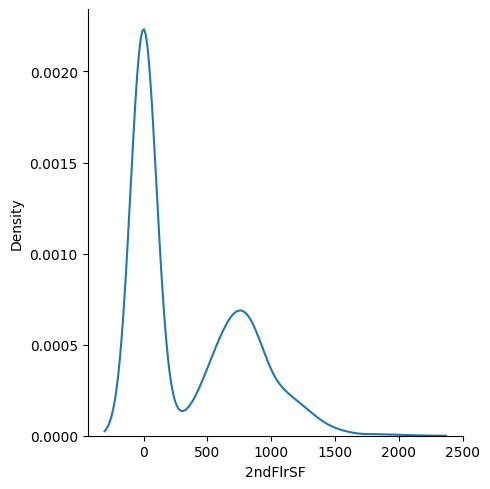

In [108]:
sn.displot(final_df['2ndFlrSF'],kind='kde')

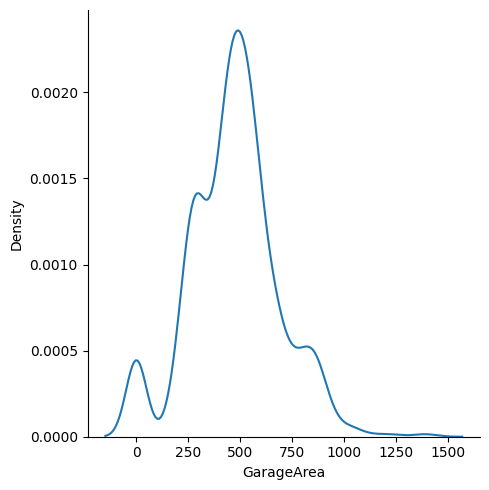

In [109]:
sn.displot(final_df['GarageArea'],kind='kde')

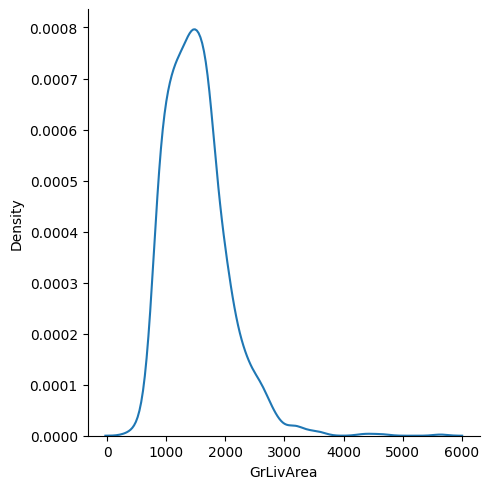

In [110]:
sn.displot(final_df['GrLivArea'],kind='kde')

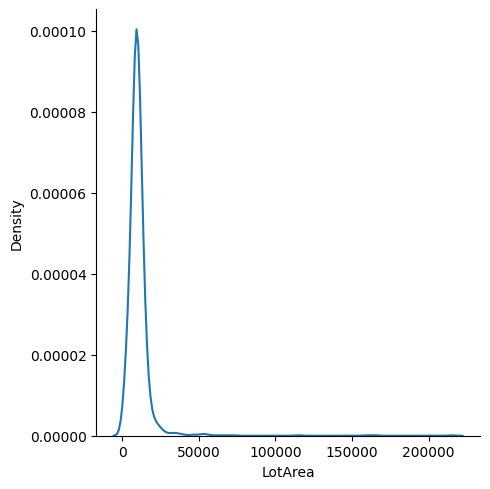

In [111]:
sn.displot(final_df['LotArea'],kind='kde')

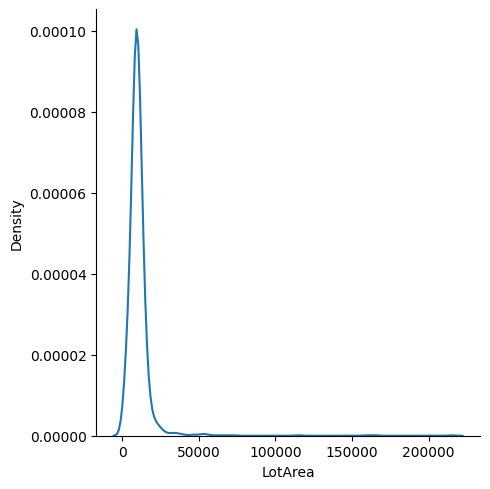

In [112]:
sn.displot(final_df['LotArea'],kind='kde')

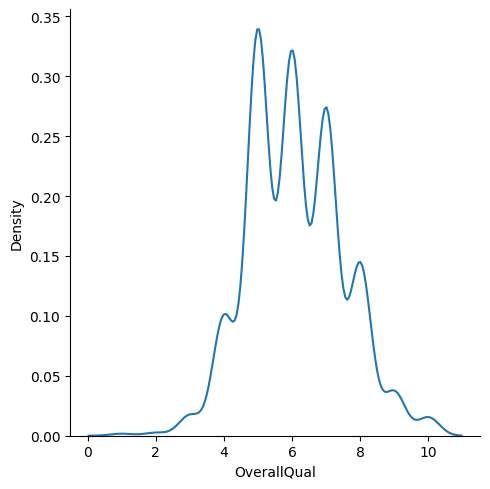

In [113]:
sn.displot(final_df['OverallQual'],kind='kde')

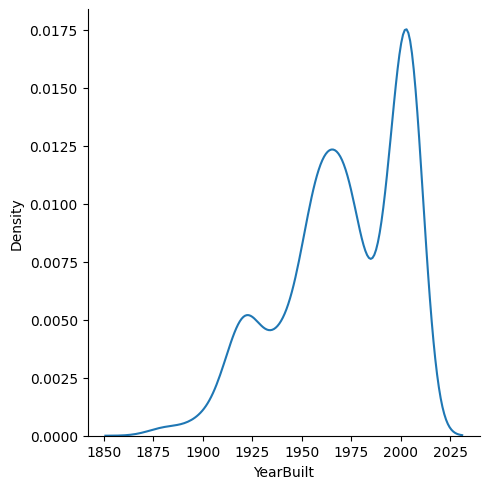

In [114]:
sn.displot(final_df['YearBuilt'],kind='kde')

array([[<Axes: xlabel='SalePrice', ylabel='SalePrice'>,
        <Axes: xlabel='LotArea', ylabel='SalePrice'>,
        <Axes: xlabel='OverallQual', ylabel='SalePrice'>,
        <Axes: xlabel='YearBuilt', ylabel='SalePrice'>,
        <Axes: xlabel='1stFlrSF', ylabel='SalePrice'>,
        <Axes: xlabel='2ndFlrSF', ylabel='SalePrice'>,
        <Axes: xlabel='GrLivArea', ylabel='SalePrice'>,
        <Axes: xlabel='GarageArea', ylabel='SalePrice'>],
       [<Axes: xlabel='SalePrice', ylabel='LotArea'>,
        <Axes: xlabel='LotArea', ylabel='LotArea'>,
        <Axes: xlabel='OverallQual', ylabel='LotArea'>,
        <Axes: xlabel='YearBuilt', ylabel='LotArea'>,
        <Axes: xlabel='1stFlrSF', ylabel='LotArea'>,
        <Axes: xlabel='2ndFlrSF', ylabel='LotArea'>,
        <Axes: xlabel='GrLivArea', ylabel='LotArea'>,
        <Axes: xlabel='GarageArea', ylabel='LotArea'>],
       [<Axes: xlabel='SalePrice', ylabel='OverallQual'>,
        <Axes: xlabel='LotArea', ylabel='OverallQual'>,
      

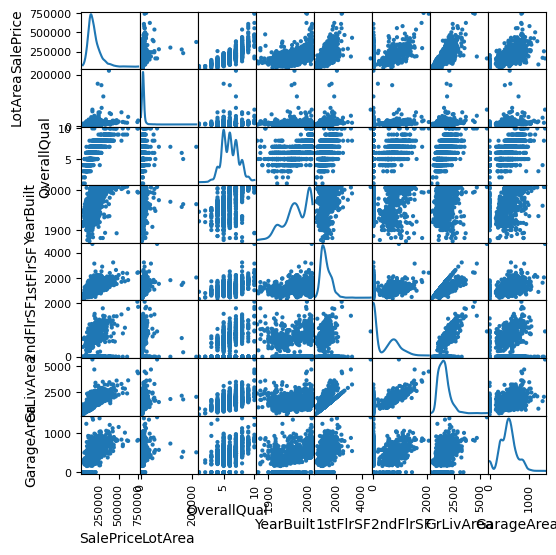

In [115]:
from pandas.plotting import scatter_matrix
scatter_matrix(final_df ,alpha=1,figsize=(6,6),diagonal='kde')


Each variable is showing the good correlation with target variable .

# **EDA for categorical vaiables**

we have pre define a dataframe(df2) with categorical variables .

**Missing value treatment**

In [116]:
df3 = df2.isna().sum()
df3

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functiol            0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [117]:
#subsetting to drop only variables with more no of missing values
df3[df3>100]

Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

Hence 'Alley'  , 'Fireplacequ' , 'poolqc', 'fence' and 'misfeature' are the variables which are insignificant for the dataframe as they are lacking more than 45% data values .

creating new dataframe with significant variables only .

In [130]:
df2.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functiol', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

all the insignificant columns have been dropped.

In [133]:
df4= df2
print(df4.shape)
print(df4.columns)

(1460, 38)
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functiol', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [134]:
df4.isna().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functiol          0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

**count plot for bivariative analysis**

count plot of the categorical variable


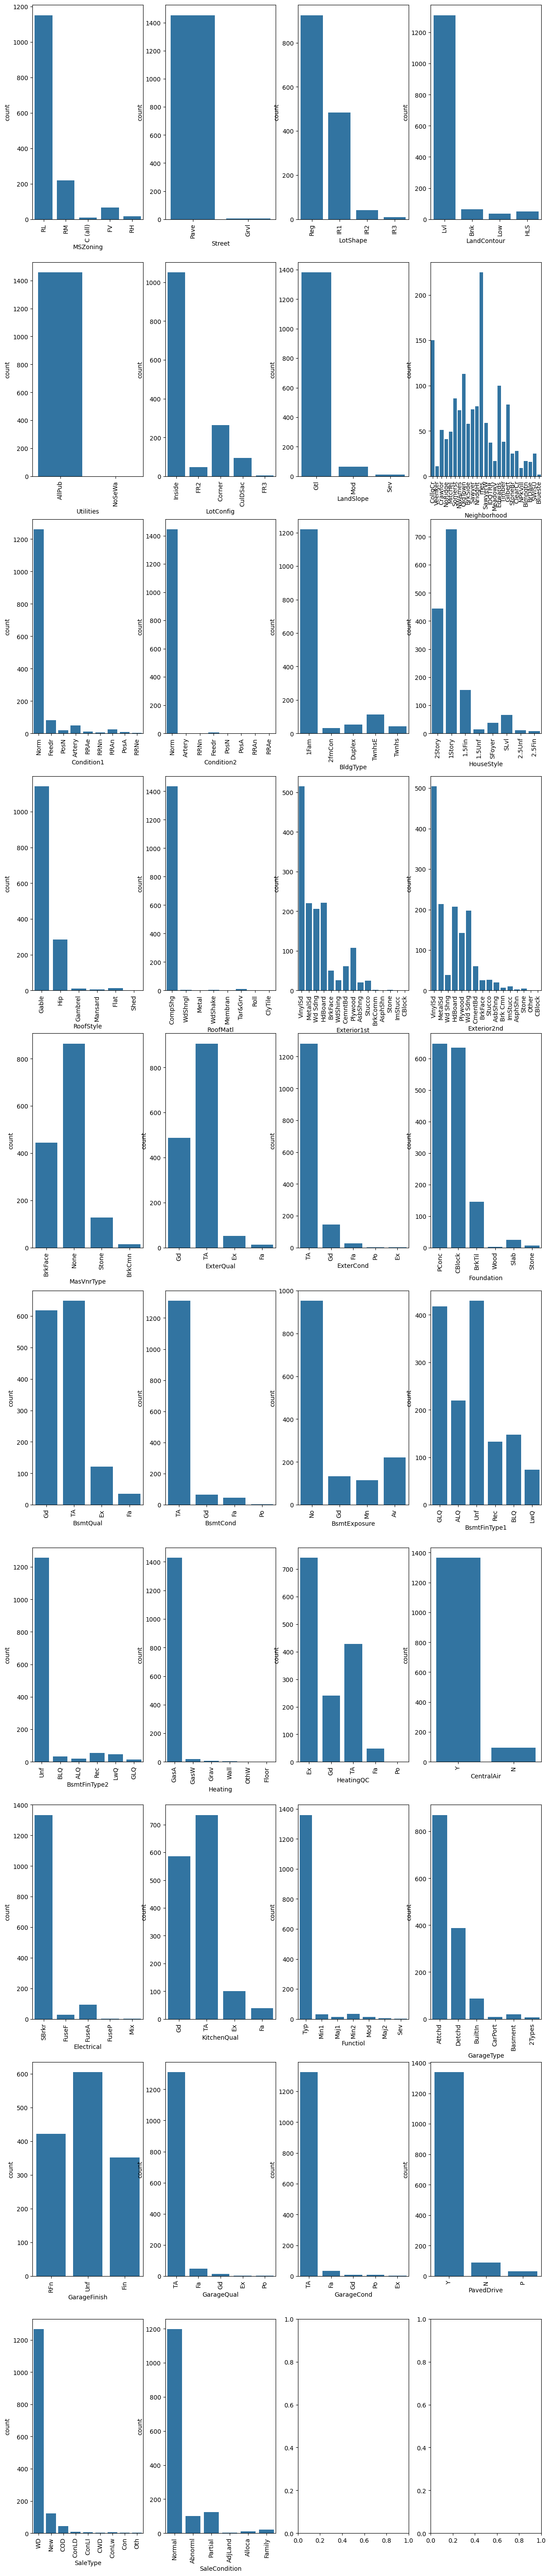

In [141]:
fig,ax = plt.subplots(10,4,figsize=(15,75))
for column,subplot in zip(df4,ax.flatten()):
    sn.countplot(x=column,data=df,ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)



here count plot shows count for each categorical column.


**Identifying significant variable using chi-square and p value test .**

In [146]:
from scipy.stats import chi2_contingency

#performing chi test for each variable
def chi_square_test(df2, target_variable):
    significant_variables = []
    for column in df4.columns:
        if column != target_variable:
            contingency_table = pd.crosstab(df[target_variable], df2[column])
            chi2, p, _, _ = chi2_contingency(contingency_table)
            if p < 0.05:  # Adjust significance level if needed
                significant_variables.append(column)
    return significant_variables

# Perform chi-square test for each variable with respect to 'Sales'
significant_variables_saleprice = chi_square_test(df, 'SalePrice')
print("Significant variables with respect to Saleprice:", significant_variables_saleprice)



Significant variables with respect to Saleprice: ['MSZoning', 'Street', 'LotShape', 'LotConfig', 'Neighborhood', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'Heating', 'CentralAir', 'KitchenQual', 'GarageFinish', 'GarageQual', 'SaleType', 'SaleCondition']


In [149]:
df5 = pd.DataFrame(significant_variables_saleprice)
df5.shape

(19, 1)

Hence these are the only significant variable for the tareted variable(Sales Price )

# **New DataFrame containing all the significant variable(Numerical(8) + Categorical(19)) for the targeted variaable SALEPRICE**

In [150]:
significant_variables_saleprice_final = ['SalePrice','LotArea','OverallQual','YearBuilt','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','MSZoning','Street','LotShape','LotConfig','Neighborhood','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtExposure','Heating','CentralAir','KitchenQual','GarageFinish','GarageQual','SaleType','SaleCondition']
df6= df[significant_variables_saleprice_final]
df6.shape

(1460, 26)

Now we have 26 variables which are significant to salesprice

# **Plotting Box Plot for df6 to find the outliers**




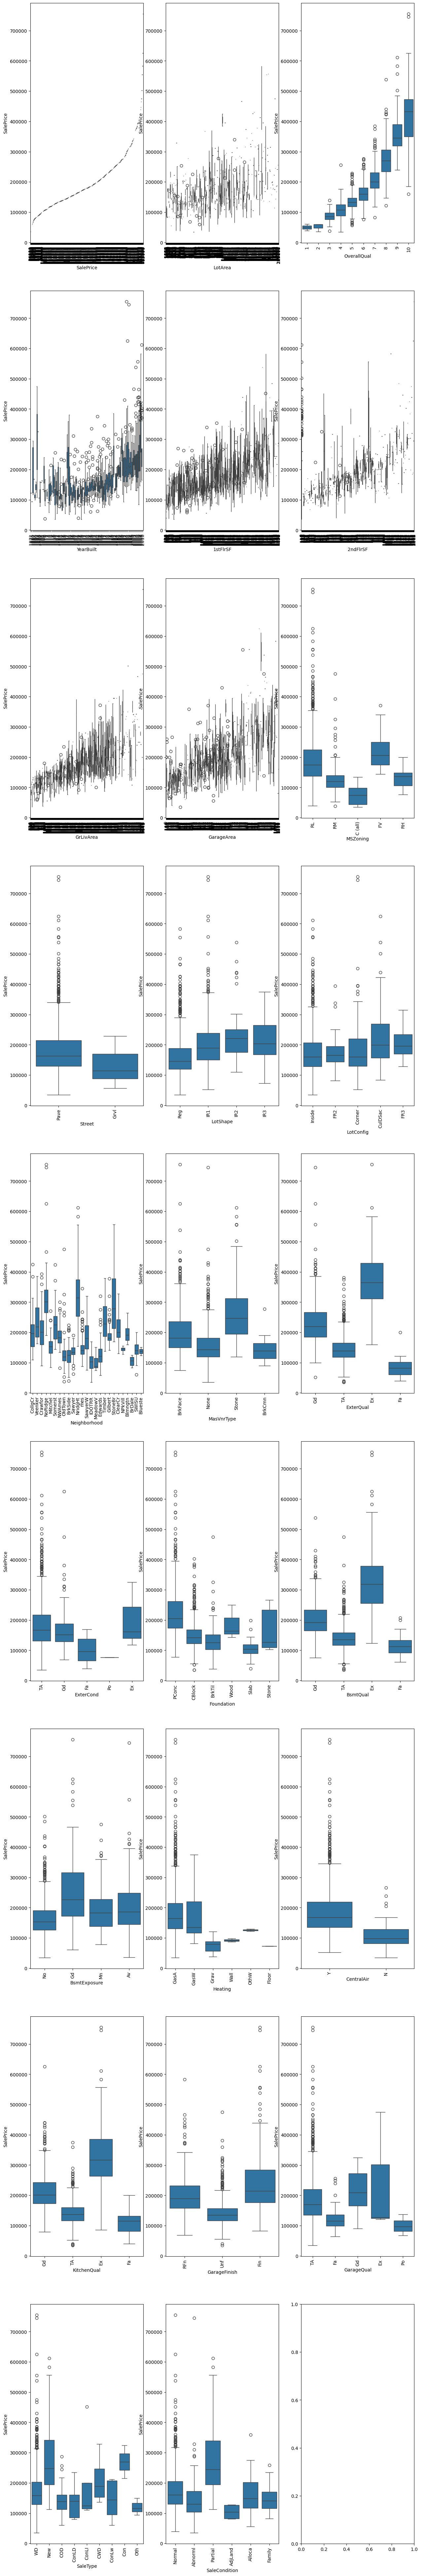

In [152]:
fig,ax=plt.subplots(9,3,figsize=(15,100))
for column,subplot in zip(df6,ax.flatten()):
    sn.boxplot(x=column,y='SalePrice',data=df,ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

variables contains outliers but we can remove them using outliers removing techniques.

# **Final Outcome**


   Out of 79 variables only 25 are influencing the Sale prices
  
